#📌 Extracción

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
df_telecom = pd.read_json('/content/TelecomX_Data.json')

In [7]:
df_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [8]:
df_customer = pd.json_normalize(df_telecom['customer'])
df_phone = pd.json_normalize(df_telecom['phone'])
df_internet = pd.json_normalize(df_telecom['internet'])
df_account = pd.json_normalize(df_telecom['account'])

In [9]:
df_telecom = pd.concat([df_telecom[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

In [10]:
df_telecom.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformación

In [12]:
valores_nulos = df_telecom.isnull().sum()
valores_nulos

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [13]:
duplicados = df_telecom.duplicated().sum()
duplicados

np.int64(0)

In [14]:
df_telecom['Charges.Total'] = df_telecom['Charges.Total'].replace(' ', np.nan)
df_telecom['Charges.Total'] = df_telecom['Charges.Total'].astype(np.float64)

In [15]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [16]:
columnas = df_telecom.select_dtypes(include='object').columns

for col in columnas:
    print(f'{col}: {df_telecom[col].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [17]:
df_telecom['Churn'] = df_telecom['Churn'].replace('', np.nan)


In [18]:
df_telecom = df_telecom.dropna(subset=['Churn'])

In [19]:
df_telecom.loc[:,'MultipleLines'] = df_telecom['MultipleLines'].replace('No phone service', 'No')

In [20]:
cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_internet:
  df_telecom[col] = df_telecom[col].replace('No internet service', 'No')

<ipython-input-20-1216124956>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecom[col] = df_telecom[col].replace('No internet service', 'No')


In [21]:
columnas = df_telecom.select_dtypes(include='object').columns

for col in columnas:
    print(f'{col}: {df_telecom[col].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['Yes' 'No']
StreamingTV: ['Yes' 'No']
StreamingMovies: ['No' 'Yes']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [22]:
df_telecom['Cuentas_Diarias'] = df_telecom['Charges.Monthly']/30

<ipython-input-22-1665778634>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecom['Cuentas_Diarias'] = df_telecom['Charges.Monthly']/30


In [23]:
df_telecom[['Charges.Monthly', 'Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [24]:
cols_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

In [25]:
reemplazo_binarias = df_telecom[cols_binarias].replace({'Yes': 1, 'No': 0}) \

df_telecom[cols_binarias] = reemplazo_binarias.astype(bool)

df_telecom[cols_binarias]

<ipython-input-25-4085526590>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reemplazo_binarias = df_telecom[cols_binarias].replace({'Yes': 1, 'No': 0}) \


,Churn,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,False,True,True,True,False,False,True,False,True,True,False,True
1,False,False,False,True,True,False,False,False,False,False,True,False
2,True,False,False,True,False,False,False,True,False,False,False,True
3,True,True,False,True,False,False,True,True,False,True,True,True
4,True,True,False,True,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7262,False,False,False,True,False,True,False,False,True,False,False,False
7263,True,True,False,True,True,False,False,False,False,False,True,True
7264,False,False,False,True,False,False,True,False,False,False,False,True
7265,False,True,True,True,False,True,False,True,True,False,True,False


In [26]:
df_telecom = df_telecom.rename(columns={
    'customerID': 'IDCliente',
    'Churn': 'Cancelacion',
    'gender': 'Genero',
    'SeniorCitizen': 'MayorDeEdad',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'MesesContratado',
    'PhoneService': 'ServicioTelefonico',
    'MultipleLines': 'MultiplesLineas',
    'InternetService': 'ServicioInternet',
    'OnlineSecurity': 'SeguridadEnLinea',
    'OnlineBackup': 'CopiaSeguridadEnLinea',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'TransmisionTelevision',
    'StreamingMovies': 'TransmisionPeliculas',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FacturacionElectronica',
    'PaymentMethod': 'MetodosPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal',
    'Cuentas_Diarias': 'CostoDiario'
})

In [27]:
df_telecom.columns

Index(['IDCliente', 'Cancelacion', 'Genero', 'MayorDeEdad', 'Pareja',
       'Dependientes', 'MesesContratado', 'ServicioTelefonico',
       'MultiplesLineas', 'ServicioInternet', 'SeguridadEnLinea',
       'CopiaSeguridadEnLinea', 'ProteccionDispositivo', 'SoporteTecnico',
       'TransmisionTelevision', 'TransmisionPeliculas', 'TipoContrato',
       'FacturacionElectronica', 'MetodosPago', 'CargoMensual', 'CargoTotal',
       'CostoDiario'],
      dtype='object')

In [28]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               7043 non-null   object 
 1   Cancelacion             7043 non-null   bool   
 2   Genero                  7043 non-null   object 
 3   MayorDeEdad             7043 non-null   int64  
 4   Pareja                  7043 non-null   bool   
 5   Dependientes            7043 non-null   bool   
 6   MesesContratado         7043 non-null   int64  
 7   ServicioTelefonico      7043 non-null   bool   
 8   MultiplesLineas         7043 non-null   bool   
 9   ServicioInternet        7043 non-null   object 
 10  SeguridadEnLinea        7043 non-null   bool   
 11  CopiaSeguridadEnLinea   7043 non-null   bool   
 12  ProteccionDispositivo   7043 non-null   bool   
 13  SoporteTecnico          7043 non-null   bool   
 14  TransmisionTelevision   7043 non-null   bool 

In [29]:
df_telecom['Genero'] = df_telecom['Genero'].replace({
    'Male': 'Hombre',
    'Female': 'Mujer'
})

In [30]:
df_telecom['MetodosPago'] = df_telecom['MetodosPago'].replace({
    'Electronic check': 'Cheque E.',
    'Mailed check': 'Cheque C.',
    'Bank transfer (automatic)': 'Transferencia',
    'Credit card (automatic)': 'Tarjeta C.'
})

In [31]:
df_telecom['TipoContrato'] = df_telecom['TipoContrato'].replace({
    'Month-to-month': 'Mes a mes',
    'Two year': 'Dos años',
    'One year': 'Un año'
})

#📊 Carga y análisis

In [32]:
#Copia del DataFrame

df_telecom_tmp = df_telecom.copy()
cols_bool = df_telecom.select_dtypes(include='bool').columns
df_telecom_tmp[cols_bool]=df_telecom_tmp[cols_bool].astype(int)

df_telecom_tmp.describe().T

,count,mean,std,min,25%,50%,75%,max
Cancelacion,7043.0,0.265370,0.441561,0.000000,0.000000,0.000,1.0000,1.000000
MayorDeEdad,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.0000,1.000000
Pareja,7043.0,0.483033,0.499748,0.000000,0.000000,0.000,1.0000,1.000000
Dependientes,7043.0,0.299588,0.458110,0.000000,0.000000,0.000,1.0000,1.000000
MesesContratado,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.0000,72.000000
ServicioTelefonico,7043.0,0.903166,0.295752,0.000000,1.000000,1.000,1.0000,1.000000
MultiplesLineas,7043.0,0.421837,0.493888,0.000000,0.000000,0.000,1.0000,1.000000
SeguridadEnLinea,7043.0,0.286668,0.452237,0.000000,0.000000,0.000,1.0000,1.000000
CopiaSeguridadEnLinea,7043.0,0.344881,0.475363,0.000000,0.000000,0.000,1.0000,1.000000
ProteccionDispositivo,7043.0,0.343888,0.475038,0.000000,0.000000,0.000,1.0000,1.000000


In [33]:
import matplotlib.pyplot as plt

import seaborn as sns

In [34]:
#Contar concelaciones

cancelaciones = df_telecom_tmp['Cancelacion'].value_counts()
cancelaciones

,count
Cancelacion,
0,5174
1,1869


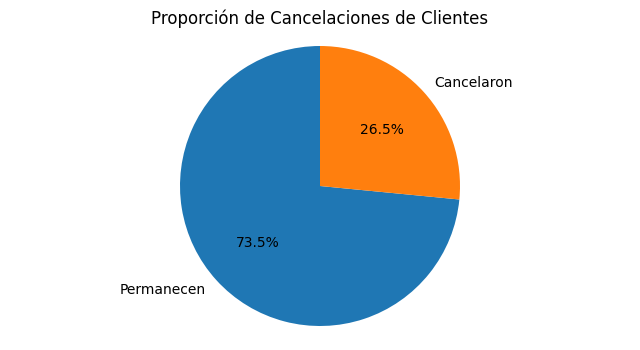

In [35]:
#Gráfico de cancelación de clientes

labels = ['Permanecen', 'Cancelaron']

plt.figure(figsize=(8,4))
plt.pie(cancelaciones, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Cancelaciones de Clientes')
plt.axis('equal')
plt.show()

In [36]:
#Cancelación por tipo de genero
cancelacion_genero = df_telecom_tmp[df_telecom_tmp['Cancelacion']==1]['Genero'].value_counts()

#Cancelación por tipo de contrato
cancelacion_contrato = df_telecom_tmp[df_telecom_tmp['Cancelacion']==1]['TipoContrato'].value_counts()

#Cancelación por método de pago
cancelacion_pago = df_telecom_tmp[df_telecom_tmp['Cancelacion']==1]['MetodosPago'].value_counts()


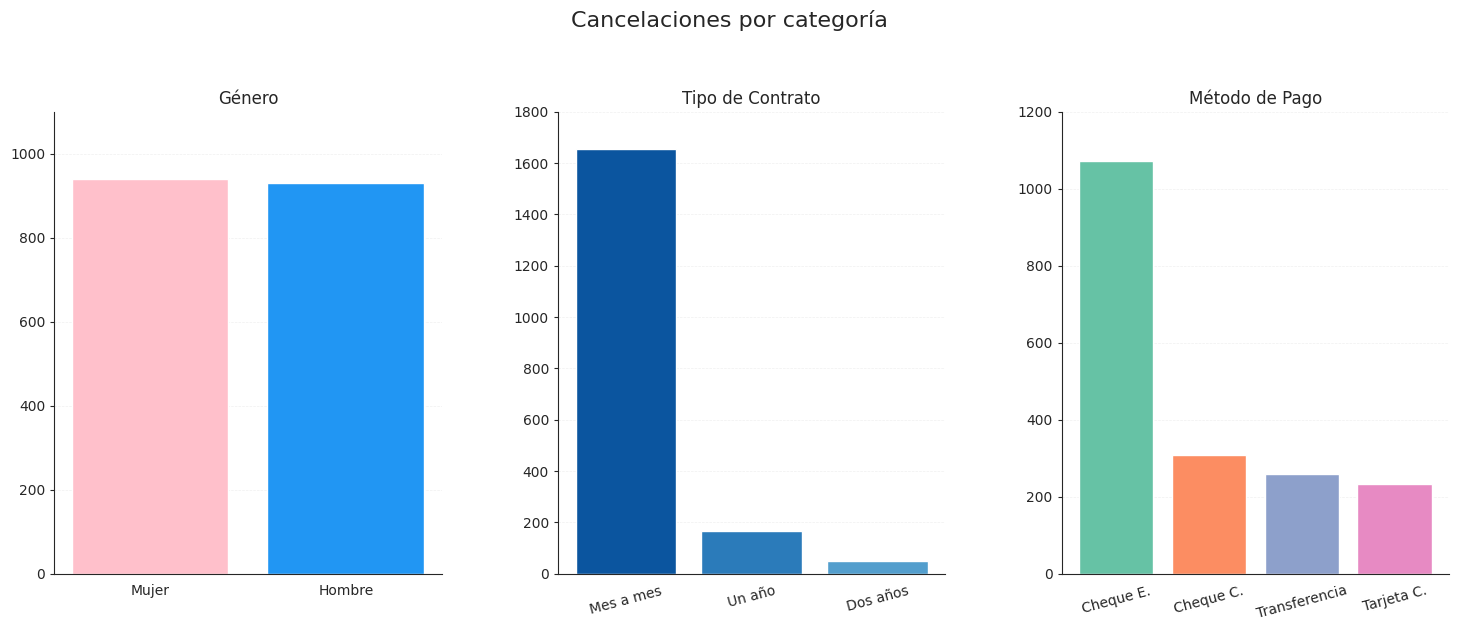

In [37]:
sns.set_style("white")

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Cancelaciones por categoría', fontsize=16, y=1.05)
fig.subplots_adjust(wspace=0.3)

# -------- Gráfico 1: Género --------
axs[0].bar(cancelacion_genero.index, cancelacion_genero.values, color=['pink', '#2196F3'])
axs[0].set_title("Género")
axs[0].set_ylim(0, 1100)

# -------- Gráfico 2: Tipo de Contrato --------
axs[1].bar(cancelacion_contrato.index, cancelacion_contrato.values, color=sns.color_palette("Blues_r"))
axs[1].set_title("Tipo de Contrato")
axs[1].set_ylim(0, 1800)
axs[1].tick_params(axis='x', rotation=15)

# -------- Gráfico 3: Método de Pago --------
total_pago = cancelacion_pago.sum()
porcentajes = (cancelacion_pago / total_pago * 100).round(1)

axs[2].bar(cancelacion_pago.index, cancelacion_pago.values, color=sns.color_palette("Set2"))
axs[2].set_title("Método de Pago")
axs[2].set_ylim(0, 1200)
axs[2].tick_params(axis='x', rotation=15)

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(axis='y', direction='out', length=3)

plt.show()

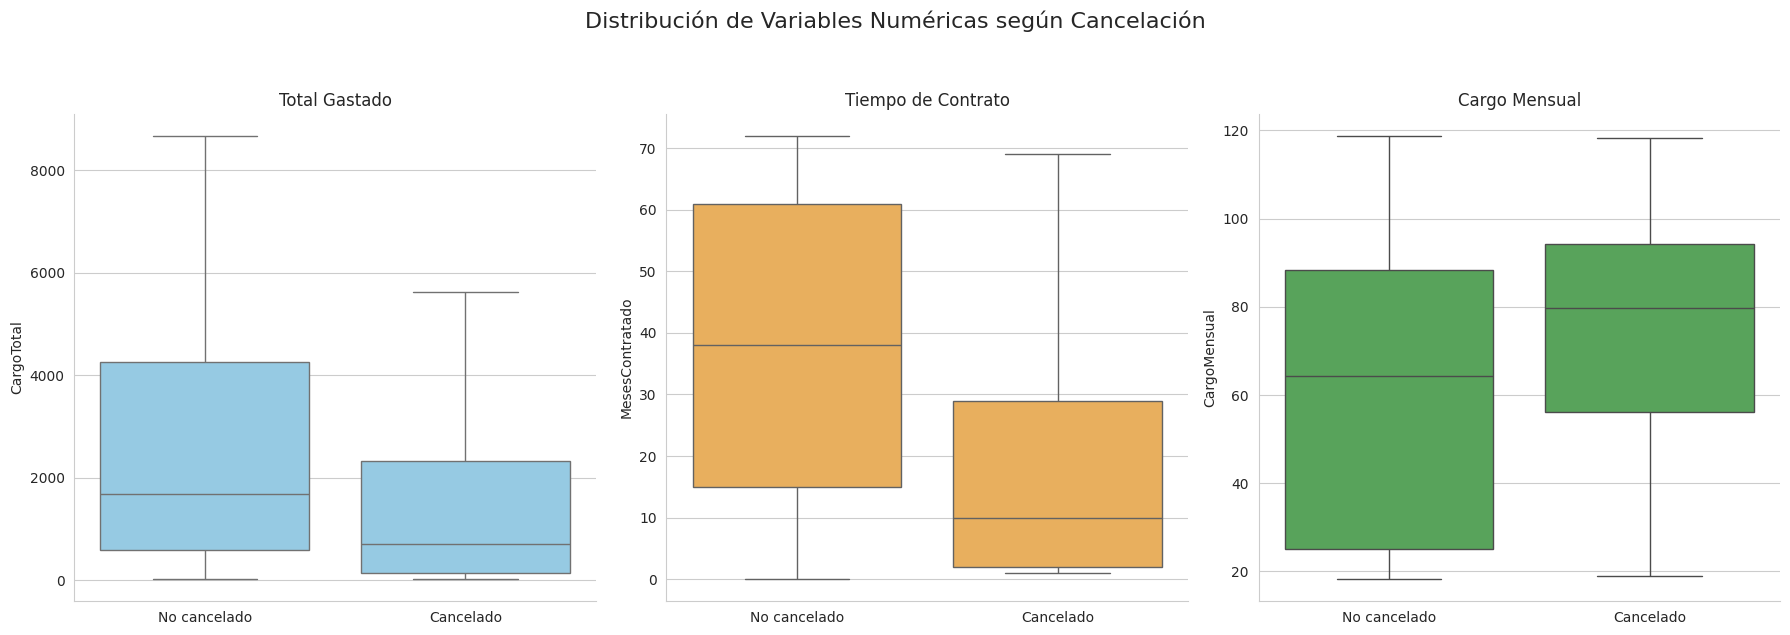

In [53]:
from matplotlib.ticker import FixedLocator, FixedFormatter

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
fig.suptitle('Análisis de distribución de gasto y tenencia según  el estado de cancelación', fontsize=16, y=1.05)

locator = FixedLocator([0, 1])
formatter = FixedFormatter(['No cancelado', 'Cancelado'])

for ax, (var, color, title) in zip(
    axes,
    [('CargoTotal', '#89CFF0', 'Total Gastado'),
     ('MesesContratado', '#FFB347', 'Tiempo de Contrato'),
     ('CargoMensual', '#4CAF50', 'Cargo Mensual')]
):
    sns.boxplot(
        x='Cancelacion', y=var, data=df_telecom,
        color=color, showfliers=False, ax=ax
    )
    ax.set_title(title)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set(xlabel=None)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


#📄Informe final

##**1. Introducción**

En este análisis buscamos entender el problema de evasión de clientes (cancelación) en TelecomX. Nuestro objetivo es identificar qué características y comportamientos están asociados con la probabilidad de cancelación del servicio, de modo de diseñar estrategias que reduzcan la tasa de churn y mejoren la retención.


##**2. Limpieza y Tratamiento de Datos**

- Importación: Cargamos los datos directamente desde la API con pd.read_json().
- Normalización: Desplegamos las columnas anidadas (customer, phone, internet, account) en un único DataFrame con pd.json_normalize y pd.concat.
- Tipos y conversiones:
  - Convertimos "Charges.Total" de texto a float64, reemplazando espacios vacíos por NaN.
  - Creamos Cuentas_Diarias = CargoMensual / 30 para analizar el gasto promedio diario.
  - Tradujimos y renombramos columnas al español para mayor claridad (ej. Churn → Cancelacion, PaymentMethod → MetodosPago).
- Valores faltantes e inconsistencias:
  - No se detectaron valores faltantes ni duplicados significativos.
  - Uniformizamos respuestas de servicio telefónico y líneas múltiples (reemplazamos "No phone service" por "No").
  - Transformamos las variables binarias (Sí/No) a booleanos (True/False) para facilitar el análisis.


##**3. Análisis Exploratorio de Datos**

###**3.1 Resumen descriptivo**

- Cancelación de clientes: aproximadamente 26.5% de los clientes se dieron de baja. Es decir, 7 de cada 10 personas permanecen, y 3 de cada 10 se van.

- Perfil del cliente:
  - Solo el 16% son mayores de edad.
  - Casi la mitad de los clientes viven en pareja.
  - El 30% tiene personas a cargo.
  - Equilibrado entre hombres y mujeres.

- Servicios contratados:

- El mayor servicio contratado es el Teléfonico con un 90%.
- El menor servicio contratado es la suscripción a seguridad en línea.

- Finanzas:

  - Costo Diario: el gasto promedio diario es de 2.16 USD.
  - Cargo Mensual: la mayoría paga entre 35 USD y 90 USD por mes.
  - Cargo Total: Mucha variabilidad, hay clientes nuevos y antiguos.
  - Meses de Contrato: la mayoría lleva entre 9 y 55 meses como cliente.

###**3.2 Análisis de distribución de gasto y tenencia según  el estado de cancelación:**

- Total Gastado:

  - No cancelado: gastan un total medio de 1.700 aproximadamente. El 50% de los clientes han gastado entre unos 600 y 4.200.
  - Cancelaron: gastan aproximadamente un total medio de 700.

  Quienes cancelan suelen haber gastado mucho menos en total que los que permanece; es muy raro que un cliente que ha gastado mucho termine desconectándose.

- Tiempo de Contrato(Tenencia en meses):

  - No cancelaron: tienen una antiguedad promedio de 38 meses.
  - Cancelaron: cortan su contrato muy pronto, aproximadamente 10 meses.

  Muchos de los canceladores abandonan en el primer año, mientras los que no lo hacen tienen una larga duración, siendo mucho más estables.

- Cargo Mensual:

  - No cancelaron: Tienen una mediana de 65 USD.
  - Cancelaron: Tienen una mediana más alta de 80 USD.

  Quienes pagan mensualidades más altas tienen mayor tendencia a cancelar, quizás porque buscar planes más económicos o penalizaciones por cambio.



##**4. Conclusiones:**

- Clientes con baja tenencia(pocos meses) y menor gasto total cancelan más.
- Cargo mensual alto se asocia a mayor cancelación.
- Los clientes con meses de contrato más alto y con alto gasto total tienden a ser leales, independientemente de su factura mensual.



##**5. Conclusiones:**

- Retención temprana: diseñar campañas y ofertas de bienvenida (descuentos o ventajas durante los primeros 6–12 meses) para aumentar la tenencia inicial.

- Ajuste de precios: evaluar planes intermedios que equilibren precio y valor, reduciendo la fuga en usuarios de tarifas altas.

- Fidelización de usuarios veteranos: implementar programas de rewards o upsells (p.ej. upgrades gratuitos, puntos de fidelidad).

- Modelos predictivos: usar las variables identificadas (tenencia, gasto total, cargo mensual, número de servicios) como insumos clave en un modelo de churn para predecir y actuar proactivamente.